# Прогнозирование вероятности оттока и кластеризация клиентов фитнес - клуба

## Описание проекта 

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.


Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.


Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.


Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.


Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.


А именно:


- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;


- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;


- проанализировать основные признаки, наиболее сильно влияющие на отток;


- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:


      1) выделить целевые группы клиентов;

      2) предложить меры по снижению оттока;
  
      3) определить другие особенности взаимодействия с клиентами.


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1">Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2">Описание данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Таблица-gym_churn-(данные-на-месяц-до-оттока-и-факт-оттока-на-определённый-месяц):" data-toc-modified-id="Таблица-gym_churn-(данные-на-месяц-до-оттока-и-факт-оттока-на-определённый-месяц):-2.0.1">Таблица gym_churn (данные на месяц до оттока и факт оттока на определённый месяц):</a></span></li></ul></li><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-2.1">Импорт библиотек</a></span></li></ul></li><li><span><a href="#Загружаем-и-изучаем-таблицу" data-toc-modified-id="Загружаем-и-изучаем-таблицу-3">Загружаем и изучаем таблицу</a></span><ul class="toc-item"><li><span><a href="#Загружаем-данные-и-сохраняем-их-в-переменные" data-toc-modified-id="Загружаем-данные-и-сохраняем-их-в-переменные-3.1">Загружаем данные и сохраняем их в переменные</a></span></li><li><span><a href="#Метод--info()" data-toc-modified-id="Метод--info()-3.2">Метод  info()</a></span><ul class="toc-item"><li><span><a href="#Наблюдения-по-методу-info-()" data-toc-modified-id="Наблюдения-по-методу-info-()-3.2.1">Наблюдения по методу info ()</a></span></li></ul></li><li><span><a href="#Метод-head()" data-toc-modified-id="Метод-head()-3.3">Метод head()</a></span><ul class="toc-item"><li><span><a href="#Наблюдения-по-методу-head-()" data-toc-modified-id="Наблюдения-по-методу-head-()-3.3.1">Наблюдения по методу head ()</a></span></li></ul></li><li><span><a href="#Предобработка-столбцов-(нижний-регистр)" data-toc-modified-id="Предобработка-столбцов-(нижний-регистр)-3.4">Предобработка столбцов (нижний регистр)</a></span></li><li><span><a href="#Изменения-типа-данных" data-toc-modified-id="Изменения-типа-данных-3.5">Изменения типа данных</a></span></li><li><span><a href="#Проверка-на-дубликаты" data-toc-modified-id="Проверка-на-дубликаты-3.6">Проверка на дубликаты</a></span><ul class="toc-item"><li><span><a href="#Наблюдения-по-методу-duplicated()" data-toc-modified-id="Наблюдения-по-методу-duplicated()-3.6.1">Наблюдения по методу duplicated()</a></span></li></ul></li><li><span><a href="#Метод-pandas_profiling" data-toc-modified-id="Метод-pandas_profiling-3.7">Метод pandas_profiling</a></span></li><li><span><a href="#Вывод-по-изучению-таблицы" data-toc-modified-id="Вывод-по-изучению-таблицы-3.8">Вывод по изучению таблицы</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-4">Исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#Метод-describe()" data-toc-modified-id="Метод-describe()-4.1">Метод describe()</a></span><ul class="toc-item"><li><span><a href="#Наблюдения-по-методу-describe-()" data-toc-modified-id="Наблюдения-по-методу-describe-()-4.1.1">Наблюдения по методу describe ()</a></span></li><li><span><a href="#Виды-переменных-в-таблице" data-toc-modified-id="Виды-переменных-в-таблице-4.1.2">Виды переменных в таблице</a></span></li><li><span><a href="#Наблюдения-по-числам-внутри-таблицы" data-toc-modified-id="Наблюдения-по-числам-внутри-таблицы-4.1.3">Наблюдения по числам внутри таблицы</a></span></li></ul></li><li><span><a href="#Средние-значения-признаков-в-двух-группах" data-toc-modified-id="Средние-значения-признаков-в-двух-группах-4.2">Средние значения признаков в двух группах</a></span></li><li><span><a href="#Наблюдения-по-методу-groupby()" data-toc-modified-id="Наблюдения-по-методу-groupby()-4.3">Наблюдения по методу groupby()</a></span></li><li><span><a href="#Вывод-по-методу-groupby()" data-toc-modified-id="Вывод-по-методу-groupby()-4.4">Вывод по методу groupby()</a></span></li><li><span><a href="#Гистограмма-количества-пользователей-целевой-перменной-(оттока)" data-toc-modified-id="Гистограмма-количества-пользователей-целевой-перменной-(оттока)-4.5">Гистограмма количества пользователей целевой перменной (оттока)</a></span></li><li><span><a href="#Наблюдения-по-гистограмме-количества-пользователей-целевой-перменной-(оттока)" data-toc-modified-id="Наблюдения-по-гистограмме-количества-пользователей-целевой-перменной-(оттока)-4.6">Наблюдения по гистограмме количества пользователей целевой перменной (оттока)</a></span></li><li><span><a href="#Гистограмма-распределения-булевых-признаков-для-групп-клиентов" data-toc-modified-id="Гистограмма-распределения-булевых-признаков-для-групп-клиентов-4.7">Гистограмма распределения булевых признаков для групп клиентов</a></span></li><li><span><a href="#Наблюдения-по-гистограмме-распределения-признаков-для-тех,-кто-ушёл-(отток)-и-тех,-кто-остался-(не-попали-в-отток)" data-toc-modified-id="Наблюдения-по-гистограмме-распределения-признаков-для-тех,-кто-ушёл-(отток)-и-тех,-кто-остался-(не-попали-в-отток)-4.8">Наблюдения по гистограмме распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)</a></span></li><li><span><a href="#Интересное-наблюдение-зависимости-между-распределением-promo_friends-и-распределением-оттока" data-toc-modified-id="Интересное-наблюдение-зависимости-между-распределением-promo_friends-и-распределением-оттока-4.9">Интересное наблюдение зависимости между распределением promo_friends и распределением оттока</a></span></li><li><span><a href="#Выводы-по-зависимости-между-распределением-promo_friends-и-распределением-оттока" data-toc-modified-id="Выводы-по-зависимости-между-распределением-promo_friends-и-распределением-оттока-4.10">Выводы по зависимости между распределением promo_friends и распределением оттока</a></span></li><li><span><a href="#Гистограммы-сравнения-качественных-признаков-по-оставшимся-и-ушедшим-а-также-'lifetime',-'month_to_end_contract',-'contract_period'" data-toc-modified-id="Гистограммы-сравнения-качественных-признаков-по-оставшимся-и-ушедшим-а-также-'lifetime',-'month_to_end_contract',-'contract_period'-4.11">Гистограммы сравнения качественных признаков по оставшимся и ушедшим а также 'lifetime', 'month_to_end_contract', 'contract_period'</a></span></li><li><span><a href="#Наблюдения-по-гистограммам" data-toc-modified-id="Наблюдения-по-гистограммам-4.12">Наблюдения по гистограммам</a></span></li><li><span><a href="#Матрица-корреляционных-связей-между-признаками" data-toc-modified-id="Матрица-корреляционных-связей-между-признаками-4.13">Матрица корреляционных связей между признаками</a></span></li><li><span><a href="#Наблюдения-по-матрице-корреляционных-связей-между-признаками" data-toc-modified-id="Наблюдения-по-матрице-корреляционных-связей-между-признаками-4.14">Наблюдения по матрице корреляционных связей между признаками</a></span></li><li><span><a href="#Вывод-по-EDA" data-toc-modified-id="Вывод-по-EDA-4.15">Вывод по EDA</a></span></li></ul></li><li><span><a href="#Построение-модели-прогнозирования-оттока-клиентов" data-toc-modified-id="Построение-модели-прогнозирования-оттока-клиентов-5">Построение модели прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Разделим-данные-на-признаки-и-целевую-переменную" data-toc-modified-id="Разделим-данные-на-признаки-и-целевую-переменную-5.1">Разделим данные на признаки и целевую переменную</a></span></li><li><span><a href="#Разделим-данные-на-обучающую-и-валидационную-выборку" data-toc-modified-id="Разделим-данные-на-обучающую-и-валидационную-выборку-5.2">Разделим данные на обучающую и валидационную выборку</a></span></li><li><span><a href="#Модель-LogisticRegression-и-оценка-ее-результатов" data-toc-modified-id="Модель-LogisticRegression-и-оценка-ее-результатов-5.3">Модель LogisticRegression и оценка ее результатов</a></span></li><li><span><a href="#Модель-RandomForestClassifier-и-оценка-ее-результатов" data-toc-modified-id="Модель-RandomForestClassifier-и-оценка-ее-результатов-5.4">Модель RandomForestClassifier и оценка ее результатов</a></span></li><li><span><a href="#Модель-GradientBoostingClassifier-и-оценка-ее-результатов" data-toc-modified-id="Модель-GradientBoostingClassifier-и-оценка-ее-результатов-5.5">Модель GradientBoostingClassifier и оценка ее результатов</a></span></li><li><span><a href="#Построим-график-ROC" data-toc-modified-id="Построим-график-ROC-5.6">Построим график ROC</a></span></li><li><span><a href="#Наблюдения" data-toc-modified-id="Наблюдения-5.7">Наблюдения</a></span></li><li><span><a href="#GradientBoostingClassifier-фичи" data-toc-modified-id="GradientBoostingClassifier-фичи-5.8">GradientBoostingClassifier фичи</a></span></li><li><span><a href="#LogisticRegression-фичи" data-toc-modified-id="LogisticRegression-фичи-5.9">LogisticRegression фичи</a></span></li><li><span><a href="#Вывод-по-построению-модели-прогнозирования-оттока-клиентов" data-toc-modified-id="Вывод-по-построению-модели-прогнозирования-оттока-клиентов-5.10">Вывод по построению модели прогнозирования оттока клиентов</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-6">Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Стандартизируем-данные" data-toc-modified-id="Стандартизируем-данные-6.1">Стандартизируем данные</a></span></li><li><span><a href="#Строим-дендограмму-матрицы-расстояний" data-toc-modified-id="Строим-дендограмму-матрицы-расстояний-6.2">Строим дендограмму матрицы расстояний</a></span></li><li><span><a href="#Наблюдения-по-дендограмме" data-toc-modified-id="Наблюдения-по-дендограмме-6.3">Наблюдения по дендограмме</a></span></li><li><span><a href="#Выделяем-кластеры-и-обучаем-модель-кластеризации-на-основании-алгоритма-K-means" data-toc-modified-id="Выделяем-кластеры-и-обучаем-модель-кластеризации-на-основании-алгоритма-K-means-6.4">Выделяем кластеры и обучаем модель кластеризации на основании алгоритма K-means</a></span></li><li><span><a href="#Наблюдения-по-таблице-кластеров" data-toc-modified-id="Наблюдения-по-таблице-кластеров-6.5">Наблюдения по таблице кластеров</a></span><ul class="toc-item"><li><span><a href="#Кластер-1" data-toc-modified-id="Кластер-1-6.5.1">Кластер 1</a></span></li><li><span><a href="#Кластер-2" data-toc-modified-id="Кластер-2-6.5.2">Кластер 2</a></span></li><li><span><a href="#Кластер-3" data-toc-modified-id="Кластер-3-6.5.3">Кластер 3</a></span></li><li><span><a href="#Кластер-4" data-toc-modified-id="Кластер-4-6.5.4">Кластер 4</a></span></li><li><span><a href="#Кластер-5" data-toc-modified-id="Кластер-5-6.5.5">Кластер 5</a></span></li></ul></li><li><span><a href="#Распределения-признаков-кластеров" data-toc-modified-id="Распределения-признаков-кластеров-6.6">Распределения признаков кластеров</a></span></li><li><span><a href="#Наблюдения" data-toc-modified-id="Наблюдения-6.7">Наблюдения</a></span></li><li><span><a href="#Гистограмма-доли-оттока-по-кластерам" data-toc-modified-id="Гистограмма-доли-оттока-по-кластерам-6.8">Гистограмма доли оттока по кластерам</a></span></li><li><span><a href="#Наблюдения-по-гистограмме-оттока-по-кластерам" data-toc-modified-id="Наблюдения-по-гистограмме-оттока-по-кластерам-6.9">Наблюдения по гистограмме оттока по кластерам</a></span></li><li><span><a href="#Вывод-по-кластеризации" data-toc-modified-id="Вывод-по-кластеризации-6.10">Вывод по кластеризации</a></span><ul class="toc-item"><li><span><a href="#Кластер-1" data-toc-modified-id="Кластер-1-6.10.1">Кластер 1</a></span></li><li><span><a href="#Кластер-2" data-toc-modified-id="Кластер-2-6.10.2">Кластер 2</a></span></li><li><span><a href="#Кластер-3" data-toc-modified-id="Кластер-3-6.10.3">Кластер 3</a></span></li><li><span><a href="#Кластер-4" data-toc-modified-id="Кластер-4-6.10.4">Кластер 4</a></span></li><li><span><a href="#Кластер-5" data-toc-modified-id="Кластер-5-6.10.5">Кластер 5</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7">Общий вывод</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-EDA" data-toc-modified-id="Вывод-по-EDA-7.1">Вывод по EDA</a></span></li><li><span><a href="#Вывод-по-построению-модели-прогнозирования-оттока-клиентов" data-toc-modified-id="Вывод-по-построению-модели-прогнозирования-оттока-клиентов-7.2">Вывод по построению модели прогнозирования оттока клиентов</a></span></li><li><span><a href="#Вывод-по-кластеризации" data-toc-modified-id="Вывод-по-кластеризации-7.3">Вывод по кластеризации</a></span><ul class="toc-item"><li><span><a href="#Кластер-1" data-toc-modified-id="Кластер-1-7.3.1">Кластер 1</a></span></li><li><span><a href="#Кластер-2" data-toc-modified-id="Кластер-2-7.3.2">Кластер 2</a></span></li><li><span><a href="#Кластер-3" data-toc-modified-id="Кластер-3-7.3.3">Кластер 3</a></span></li><li><span><a href="#Кластер-4" data-toc-modified-id="Кластер-4-7.3.4">Кластер 4</a></span></li><li><span><a href="#Кластер-5" data-toc-modified-id="Кластер-5-7.3.5">Кластер 5</a></span></li></ul></li></ul></li><li><span><a href="#Рекомендации" data-toc-modified-id="Рекомендации-8">Рекомендации</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Кластер-1" data-toc-modified-id="Кластер-1-8.0.1">Кластер 1</a></span></li><li><span><a href="#Кластер-2" data-toc-modified-id="Кластер-2-8.0.2">Кластер 2</a></span></li></ul></li></ul></li><li><span><a href="#Рекомендации" data-toc-modified-id="Рекомендации-9">Рекомендации</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Кластер-1" data-toc-modified-id="Кластер-1-9.0.1">Кластер 1</a></span></li><li><span><a href="#Кластер-2" data-toc-modified-id="Кластер-2-9.0.2">Кластер 2</a></span></li><li><span><a href="#Кластер-3" data-toc-modified-id="Кластер-3-9.0.3">Кластер 3</a></span></li><li><span><a href="#Кластер-4" data-toc-modified-id="Кластер-4-9.0.4">Кластер 4</a></span></li><li><span><a href="#Кластер-5" data-toc-modified-id="Кластер-5-9.0.5">Кластер 5</a></span></li></ul></li></ul></li></ul></div>

## Описание данных

#### Таблица gym_churn (данные на месяц до оттока и факт оттока на определённый месяц):
Данные клиента за предыдущий до проверки факта оттока месяц:


    - 'gender' — пол;
    - 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
    - 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
    - Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
    - 'Phone' — наличие контактного телефона;
    - 'Age' — возраст;
    - 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).


Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:


    - 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
    - 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
    - 'Group_visits' — факт посещения групповых занятий;
    - 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
    - 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
    - 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
    - 'Churn' — факт оттока в текущем месяце.


### Импорт библиотек

In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
import sklearn.metrics as metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

## Загружаем и изучаем таблицу

### Загружаем данные и сохраняем их в переменные

In [10]:
# Создаем переменную путь к файлу
#(можно заменить на свои при работе на локальном устройстве)
file_path = '/Users/danielnodelman/Downloads/'
try:
# Загружаем данные в переменные на локальном утройстве 
    gym_churn = (pd.read_csv('/datasets/gym_churn.csv', index_col=False))
                                   
except:
# Загружаем данные в переменные 
    gym_churn = (pd.read_csv(file_path + 'gym_churn.csv', index_col=False))

### Метод  info()

In [11]:
gym_churn.info()
gym_churn.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

(4000, 14)

#### Наблюдения по методу info () 

- Таблица  содержит 14 столбцов по 4000 строк


- Пропуски отсутствуют 


- Все значения числовые


- тип данных переменной month_to_end_contract нужно изменить на int

### Метод head()

In [12]:
gym_churn.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


#### Наблюдения по методу head () 

- Аномалий не обнаружено, нужно привести столбцы к нижнему (змеиному) регистру

### Предобработка столбцов (нижний регистр)

In [13]:
gym_churn.columns = gym_churn.columns.str.lower()

### Изменения типа данных

In [14]:
gym_churn['month_to_end_contract'] = gym_churn['month_to_end_contract'].astype(int)

### Проверка на дубликаты

In [15]:
print("Количество дубликатов в таблице gym_churn:", 
      gym_churn.duplicated().sum()
     )

Количество дубликатов в таблице gym_churn: 0


#### Наблюдения по методу duplicated()

- явных дубликатов не обнаружено

### Метод pandas_profiling

In [28]:
#pip install pandas-profiling
#import pandas_profiling
#pandas_profiling.ProfileReport(gym_churn)

### Вывод по изучению таблицы

- Таблица  содержит 14 столбцов по 4000 строк


- Все значения числовые


- Пропуски отсутствуют 


- Явных дубликатов не обнаружено


- Названия столбцов приведены к нижнему регистру


- Столбец month_to_end_contract тип данных приведен к int

## Исследовательский анализ данных (EDA)

### Метод describe()

In [27]:
gym_churn.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


#### Наблюдения по методу describe () 
#### Виды переменных в таблице
- к переменным типа 0/1 относятся данные в столбцах gender, near_location,partner, promo_friends, phone, group_visits, churn


- к категориальным перменным относятся contract_period, lifetime, month_to_end_contract 


- к количественным переменным относятся  age, avg_additional_charges_total, avg_class_frequency_total, avg_class_frequency_current_month


#### Наблюдения по числам внутри таблицы 
- По столбцу age средний возраст клиентов - 29 лет


- По столбцу gender примерно одинаковое количество мужчин и женщин.


- По столбцу group_visits 41,2% клиентов посещают групповые занятия 


- По столбцу partner 48,7% клиентов являются партнерскими


- По столбцу avg_class_frequency_total клиенты посещают зал 2 раза в неделю 


- По столбцу near_location 84,5% клиентов часто бывают рядом с фитнес центром 


- По столбцу promo_friends 30,8% составляют приглашенные друзьями клиенты 


- По столбцу churn 26,5% клиентов уходят в отток


- По столбцу avg_additional_charges_total 136,2 у.е клиенты тратят на доп услуги 

### Средние значения признаков в двух группах 
Выводим средние значения по всем признакам между группами тех, кто ушел в отток и тех, кто остался

In [32]:
# выводим метоод groupby по 'churn'
(gym_churn
        .groupby('churn')
        .mean()
       )

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


### Наблюдения по методу groupby()

- По столбцу gender: сильных различий не наблюдается 


- По столбцу near_location: незначительное различие в пользу оставшихся клиентов


- По столбцу partner: незначительное различие в пользу оставшихся клиентов


- По столбцу promo_friends: незначительное различие в пользу оставшихся клиентов


- По столбцу phone:сильных различий не наблюдается 


- По столбцу contract_period: значительное различие в пользу оставшихся клиентов

 
- По столбцу group_visits: значительное различие в пользу оставшихся клиентов


- По столбцу age: в среднем оставшиеся клиенты на 3 года старше чем ушедшие в отток


- По столбцу avg_additional_charges_total: значительное различие в пользу оставшихся клиентов 


- По столбцу month_to_end_contract: значительное различие в пользу оставшихся клиентов 


- По столбцу lifetime: значительное различие в пользу оставшихся клиентов (логично)


- По столбцу avg_class_frequency_total: значительное различие в пользу оставшихся клиентов 


- По столбцу avg_class_frequency_current_month: значительное различие в пользу оставшихся клиентов 


### Вывод по методу groupby()


Оставшиеся клиенты старше в среднем на 3 года, то есть возраст играет роль, их метрики выше. Разницы в поле нет.

### Гистограмма количества пользователей целевой перменной (оттока)

Посмотрим, как распределились клиенты по группам 'отток/остались' по общему количесту в процентном соотношении. Для этого построим гистограмму и изучим ее результаты.

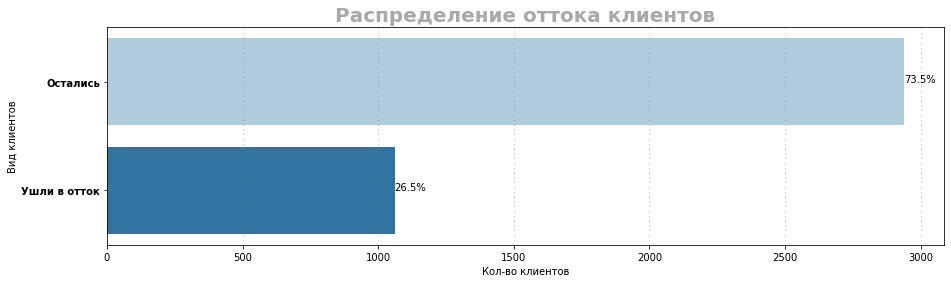

In [34]:
# Цветовая палетка для парных значений
sns.set_palette("Paired")
# Определяем размер графика
fig = plt.figure(figsize=(15,4)
                )
# Создаем переменную с гистограммой
ax_churn = sns.countplot(y = 'churn',
                         data = gym_churn
                        )
# Задаем параметры сетки на графике
ax_churn.grid(b=True,
              color = 'grey',
              linestyle = '-',
              axis = 'x',
              dashes = (1,5),
              alpha = 4
             )
# Подписываем график
ax_churn.set_title('Распределение оттока клиентов', 
                    fontsize = 20,
                    fontweight = 'bold', 
                    color = 'darkgrey'
                  )
# Подписываем график
ax_churn.set_xlabel('Кол-во клиентов')
# Подписываем график
ax_churn.set_ylabel('Вид клиентов')
ax_churn.set_yticklabels(['Остались','Ушли в отток'],
                         fontweight = 'bold'
                        )
# Выделяем переменную для подсчета метрик 
total = gym_churn.shape[0]
# Создаем цикл для подсчета процентов
for p in ax_churn.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width() / total)
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height() / 2
        ax_churn.annotate(percentage,
                          (x, y
                          )
                         )

### Наблюдения по гистограмме количества пользователей целевой перменной (оттока)

- Больше 1/4 клиентов (26,5%) попали в отток.


- 73.5% остались с бизнесом


Посмотрим на распределение признаков между клиентами по булевым признакам

###  Гистограмма распределения булевых признаков для групп клиентов

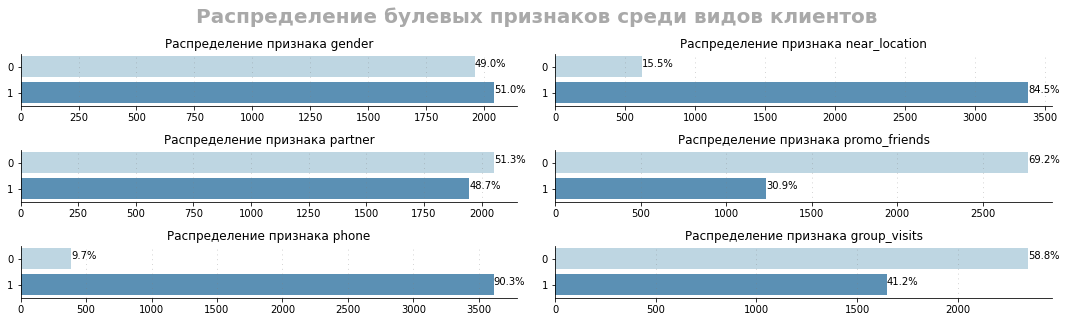

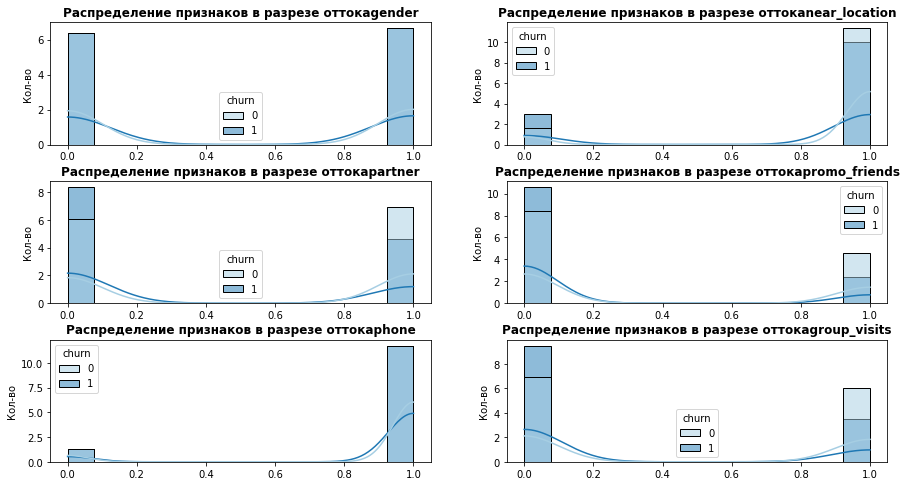

In [47]:
# Задаем размер графика
fig = plt.figure(figsize=(15, 7)
                )
# Создаем список с признаками, содержащими 
# bool переменные
boolean_columns = ('gender', 
                   'near_location',
                   'partner',
                   'promo_friends',
                   'phone', 
                   'group_visits',
                  )
# Подписываем график
fig.suptitle('Распределение булевых признаков среди видов клиентов',
             fontsize = 20,
             fontweight = 'bold',
             color = 'darkgrey'
            )
# Создаем цикл, который проходит по колонкам 
# и строит графики с заданными параметрами, 
# а также подписывает их
for i, col in enumerate(boolean_columns):
    ax = fig.add_subplot(5,
                         2,
                         i+1
                        )
    ax = sns.countplot(y = col,
                       data = gym_churn,
                       alpha = 0.8
                      )
    ax.grid(b=True,
            color='grey',
            linestyle='-',
            axis='x',
            dashes = (1,5),
            alpha = 0.5
           )
    ax.set_title('Распределение признака {}'
                 .format(col
                        )
                )
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax_churn.set_yticklabels(['Остались','Ушли в отток'],
                         fontweight = 'bold'
                        )

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 *
                                      p.get_width()
                                      / total
                                     )
        x = (p.get_x() + 
             p.get_width()
            )
        y = (p.get_y() + 
             p.get_height()
             / 2)
        ax.annotate(percentage,
                    (x, y)
                   )

fig.tight_layout()
sns.despine()
plt.show()

fig = plt.figure(figsize = (15, 11))

for i, column in enumerate(boolean_columns):
    ax_quan=fig.add_subplot(4,2,i+1)
    sns.histplot(x = column,
                 hue = 'churn',
                 stat="density",
                  common_norm=False,
                 data = gym_churn,
                 kde = True
                )
    ax.set_yticklabels(['Остались','Ушли в отток'],
                       fontweight = 'bold'
                      )
    plt.title('Распределение признаков в разрезе оттока' 
              + column,
              fontweight = 'bold') 
    plt.xlabel('')
    plt.ylabel('Кол-во')
    plt.subplots_adjust(hspace = 0.3)
plt.show()

### Наблюдения по гистограмме распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

- к выводам по groupby выше добавились процентные значения 


- обратим внимание на интересную закономерность между графиками 'Распределение оттока клиентов' и 'Распределение признака promote_friends': визуально они очень похожи


Посмотрим на то, как последные признаки (churn, promote_friends) сочетаются между собой 

### Интересное наблюдение зависимости между распределением promo_friends и распределением оттока

Два графика похожи между собой посмотрим сколько корпоративных клиентов среди приглашенных друзьями и наоборот

In [44]:
# Группируем по признакам и считаем кол-во клиентов
gym_churn.groupby(['promo_friends',
                   'partner'],
                  as_index=False)['gender'].count()

,promo_friends,partner,gender
0,0,0,1837
1,0,1,929
2,1,0,216
3,1,1,1018


### Выводы по зависимости между распределением promo_friends и распределением оттока

- Существует 1018 клиетов, которых пригласили друзья, а также они являются членами партнерской программы.

Ситуация типичная, ведь часто сотрудники партнерской компании советуют друг другу фитнес центры на которые им выделяется скидка. Часто система приглашения друзей создает персональные скидки и выгодные условия для владельцев абонемента за каждого приглашенного друга.


Посмотрим как распределяются качественные признаки среди видов клиентов

### Гистограммы сравнения качественных признаков по оставшимся и ушедшим а также 'lifetime', 'month_to_end_contract', 'contract_period'

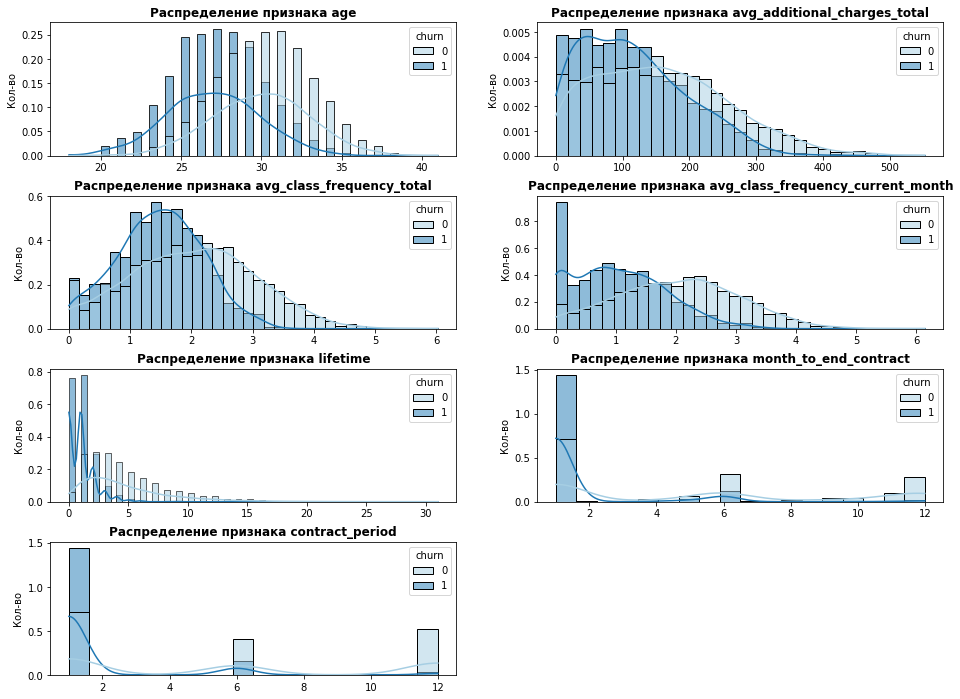

In [46]:
# Столбцы с качественными признаками
quantitative_variables = ['age', 
                          'avg_additional_charges_total', 
                          'avg_class_frequency_total', 
                          'avg_class_frequency_current_month',
                         'lifetime',
                         'month_to_end_contract',
                          'contract_period'
                         ]
# Задаем размер графиков
fig = plt.figure(figsize = (16,12)
              )
# Cоздаем цикл для построения графиков 
for i, column in enumerate(quantitative_variables):
    ax_quan=fig.add_subplot(4,2,i+1)
    sns.histplot(x = column,
                 stat="density",
                 hue = 'churn',
                 common_norm=False, 
                 data = gym_churn,
                 kde = True
                )
    ax.set_yticklabels(['Остались','Ушли в отток'],
                       fontweight = 'bold'
                      )
    plt.title('Распределение признака ' 
              + column,
              fontweight = 'bold') 
    plt.xlabel('')
    plt.ylabel('Кол-во')
    plt.subplots_adjust(hspace = 0.3)
plt.show()

###  Наблюдения по гистограммам

-  Признак age распределен нормально для обеих типов клиентов


- Распределение признаков avg_class_frequency_total, avg_class_frequency_current_month близко к нормальному


- Признак avg_class_frequency_total  отклоняется от нормального распределения 


- Большинство клиентов уходит в первый месяц по признаку month_to_end_contract


- lifetime у ушедших клиентов короткий


- по признаку contract_period у ушедших клиентов контракт чаще всего подписан на месяц

### Матрица корреляционных связей между признаками

Посмотрим, как признаки коррелируют между собой. Построим матрицу корреляционных связей и сделаем выводы на ее основании.

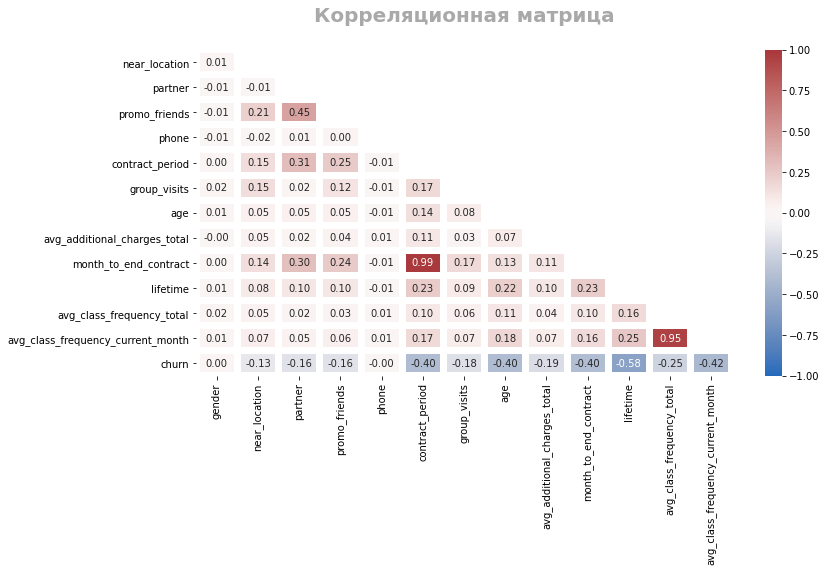

In [52]:
# Определяяем размер матрицы
plt.figure(figsize=(12, 6)
          ) 
# Задаем параметры корреляции
matrix = np.triu(gym_churn
                 .corr('spearman')
                )
# Строим график, задаем параметры отображения данных
sns.heatmap(gym_churn.corr('spearman')
            .iloc[1:, :-1],
            mask = matrix[1:, :-1],
            annot = True, 
            cmap = 'vlag',
            square = False, 
            linewidths = 6, 
            linecolor ='white',
            vmin = -1,
            vmax = 1,
            center = 0,
            fmt = '.2f'
           )
# Подписываем график
plt.title('Корреляционная матрица\n',
             fontsize = 20,
             fontweight = 'bold',
             color = 'darkgrey'
            )
# Выводим график
plt.show()

### Наблюдения по матрице корреляционных связей между признаками

- Отток пользователей обратно коррелирует со средней частотой посещений в неделю за пред. месяц, с кол-во месяцев первого обращения, возраст. 


- Наибольшая корреляция по признакам длительности абонемента и среднего посещения, это логично


- Прямая корреляция наблюдается между средней частотой посещений в неделю за все время с начала действия абонемента и средней частотой посещений в неделю за предыдущий месяц (0,95).


- Средняя отрицательная корреляция (-0,583) наблюдается между оттоком клиентов и временем с момента первого обращения в фитнес-центр. 


- Сильная корреляция наблюдается между длительностью текущего действующего абонемента и сроком до окончания текущего действующего абонемента (0,99).


- Чтобы исключить частично мультиколлинеарность один из пары сильно коррелирующих признаков нужно удалить или применить регуляризацию.


### Вывод по EDA

- Больше 1/4 клиентов (26,5%) попали в отток.

 
- Существует 1018 клиетов, которых пригласили друзья, а также они являются членами партнерской программы.

Ситуация типичная, ведь часто сотрудники партнерской компании советуют друг другу фитнес центры на которые им выделяется скидка. Часто система приглашения друзей создает персональные скидки и выгодные условия для владельцев абонемента за каждого приглашенного друга.


- Большинство клиентов уходит в первый месяц по признаку month_to_end_contract


- Отток пользователей обратно коррелирует со средней частотой посещений в неделю за пред. месяц, с кол-во месяцев первого обращения, возраст. 


- Наибольшая корреляция по признакам длительности абонемента и среднего посещения, это логично


- Чтобы исключить частично мультиколлинеарность один из пары сильно коррелирующих признаков нужно удалить или применить регуляризацию.


## Построение модели прогнозирования оттока клиентов

Построим модели бинарной классификации клиентов. Целевым прищнаком будет являться отток клиентов в след месяце


Для этого будем использовать:


- модель логистической регрессии - Logistic Regression


- модель случайного леса - Random Forest Classifier


- Градиентный бустинг GradientBoostingClassifier

### Разделим данные на признаки и целевую переменную

In [54]:
X = gym_churn.drop('churn', axis =1)
y = gym_churn['churn']

### Разделим данные на обучающую и валидационную выборку 

Разделяем модели 20/80 на обучающую и валидационную функцией train_test_split().

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 0
                                                   )

### Модель LogisticRegression и оценка ее результатов 

In [56]:
# Создаем модель
model_lr = LogisticRegression(solver='liblinear', 
                              random_state=0, 
                              penalty='l1',
                              C=1.0
                             )
# Обучаем
model_lr.fit(X_train, y_train)
# Предполагаем
predictions_lr = model_lr.predict(X_test)
probabilities_lr = model_lr.predict_proba(X_test)[:,1]
# Выводим метрики
print('Accuracy: {:.2f}' .format(accuracy_score(y_test,
                                                predictions_lr)
                                )
     )
print('Precision: {:.2f}' .format(precision_score(y_test,
                                                  predictions_lr)
                                 )
     )
print('Recall: {:.2f}' .format(recall_score(y_test,
                                            predictions_lr)
                              )
     )
print('F1: {:.2f}' .format(f1_score(y_test,
                                    predictions_lr)
                          )
     )
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test,
                                             probabilities_lr)
                              )
     )

Accuracy: 0.94
Precision: 0.89
Recall: 0.86
F1: 0.88
ROC_AUC: 0.98


### Модель RandomForestClassifier и оценка ее результатов 

In [57]:
# Создаем модель
model_rf = RandomForestClassifier(#n_estimators = 100,
                                  random_state = 0 
                                 )
# Обучаем
model_rf.fit(X_train, y_train)
# Предполагаем
predictions_rf = model_rf.predict(X_test)
probabilities_rf = model_rf.predict_proba(X_test)[:,1]
# Выводим метрики
print('Accuracy: {:.2f}' .format(accuracy_score(y_test,
                                                predictions_rf)
                                )
     )
print('Precision: {:.2f}' .format(precision_score(y_test,
                                                  predictions_rf)
                                 )
     )
print('Recall: {:.2f}' .format(recall_score(y_test,
                                            predictions_rf)
                              )
     )
print('F1: {:.2f}' .format(f1_score(y_test,
                                    predictions_rf)
                          )
     )
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test,
                                             probabilities_rf)
                              )
     )

Accuracy: 0.92
Precision: 0.88
Recall: 0.83
F1: 0.85
ROC_AUC: 0.97


### Модель GradientBoostingClassifier и оценка ее результатов 

In [59]:
# Создаем модель и устанавливаем порог 0.3
model_gb = GradientBoostingClassifier(learning_rate=0.3,
                                      random_state = 0 
                                     )
# Обучаем
model_gb.fit(X_train, y_train)
# Предполагаем
predictions_gb = model_gb.predict(X_test)
probabilities_gb = model_gb.predict_proba(X_test)[:,1]
# Выводим метрики
print('Accuracy: {:.2f}' .format(accuracy_score(y_test,
                                                predictions_gb)
                                )
     )
print('Precision: {:.2f}' .format(precision_score(y_test,
                                                  predictions_gb)
                                 )
     )
print('Recall: {:.2f}' .format(recall_score(y_test,
                                            predictions_gb)
                              )
     )
print('F1: {:.2f}' .format(f1_score(y_test,
                                    predictions_gb)
                          )
     )
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test,
                                             probabilities_gb)
                              )
     )

Accuracy: 0.95
Precision: 0.94
Recall: 0.86
F1: 0.90
ROC_AUC: 0.99


### Построим график ROC

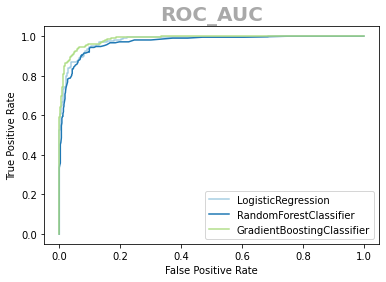

In [60]:
plt.figure(0).clf()
fpr, tpr, thresh = metrics.roc_curve(y_test,
                                     probabilities_lr)
plt.plot(fpr,
         tpr,
         label = "LogisticRegression")
fpr, tpr, thresh = metrics.roc_curve(y_test,
                                     probabilities_rf)
plt.plot(fpr,
         tpr,
         label = "RandomForestClassifier")
fpr, tpr, thresh = metrics.roc_curve(y_test,
                                     probabilities_gb)
plt.plot(fpr,
         tpr,
         label = "GradientBoostingClassifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC',
          fontsize = 20,
                    fontweight = 'bold', 
                    color = 'darkgrey'
                  )
plt.legend(loc = 0)
plt.show()

### Наблюдения 

Наилучшие показатели у модели GradientBoostingClassifier

- Accuracy: 0.95
- Precision: 0.94
- Recall: 0.86
- F1: 0.90
- ROC_AUC: 0.99

На втором месте показатели модели логической регресии LogisticRegression

Посмотрим на фичи

### GradientBoostingClassifier фичи



In [61]:
# Форматирование чисел
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Создаем фрейм
gb_features = pd.DataFrame({
            'feature' : list(X_train.columns),
            'coeff' : model_gb.feature_importances_
        }).sort_values('coeff', ascending=False).reset_index(drop=True)
gb_features

,feature,coeff
0,lifetime,0.42
1,avg_class_frequency_current_month,0.16
2,avg_class_frequency_total,0.15
3,age,0.10
4,month_to_end_contract,0.08
5,contract_period,0.04
6,avg_additional_charges_total,0.03
7,group_visits,0.01
8,gender,0.00
9,promo_friends,0.00


### LogisticRegression фичи

In [62]:
# Создаем фрейм
lr_features = pd.DataFrame({
    'feature': list(X_train.columns)
    , 'coeff': model_lr.coef_[0]
}).sort_values(by='coeff', ascending=False).reset_index(drop = True)
lr_features

,feature,coeff
0,avg_class_frequency_total,3.62
1,gender,0.00
2,phone,0.00
3,avg_additional_charges_total,-0.01
4,near_location,-0.08
5,partner,-0.09
6,month_to_end_contract,-0.14
7,contract_period,-0.17
8,promo_friends,-0.31
9,age,-0.34


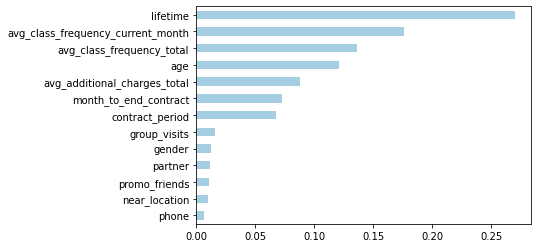

In [63]:
### КОД РЕВЬЮЕРА

pd.Series(model_rf.feature_importances_,index=X.columns).sort_values().plot(kind="barh");

### Вывод по построению модели прогнозирования оттока клиентов

- По показателям лучшая модель - GradientBoostingClassifier


Ее показатели по метрикам: 

- Accuracy: 0.95
- Precision: 0.94
- Recall: 0.86
- F1: 0.90
- ROC_AUC: 0.99

По топ - 3 фич:

- lifetime
- avg_class_frequency_current_month
- avg_class_frequency_total


Влияние лайфтайма на отток логично - чем больше человек ходит, тем больше у него мотивации





Чаще всего уходят молодые пользователи, это может быть обусловленно нестабильностью доходов, отсутсвием мотивации. 


Влияние лайфтайма на отток логично - чем больше человек ходит, тем больше

## Кластеризация клиентов

### Стандартизируем данные

In [67]:
# В переменной сохраняем метод
scaler = StandardScaler()
# Стандартизируем
X_sc = scaler.fit_transform(gym_churn.drop(columns = 
                                           ['churn']
                                          )
                           )

### Строим дендограмму матрицы расстояний

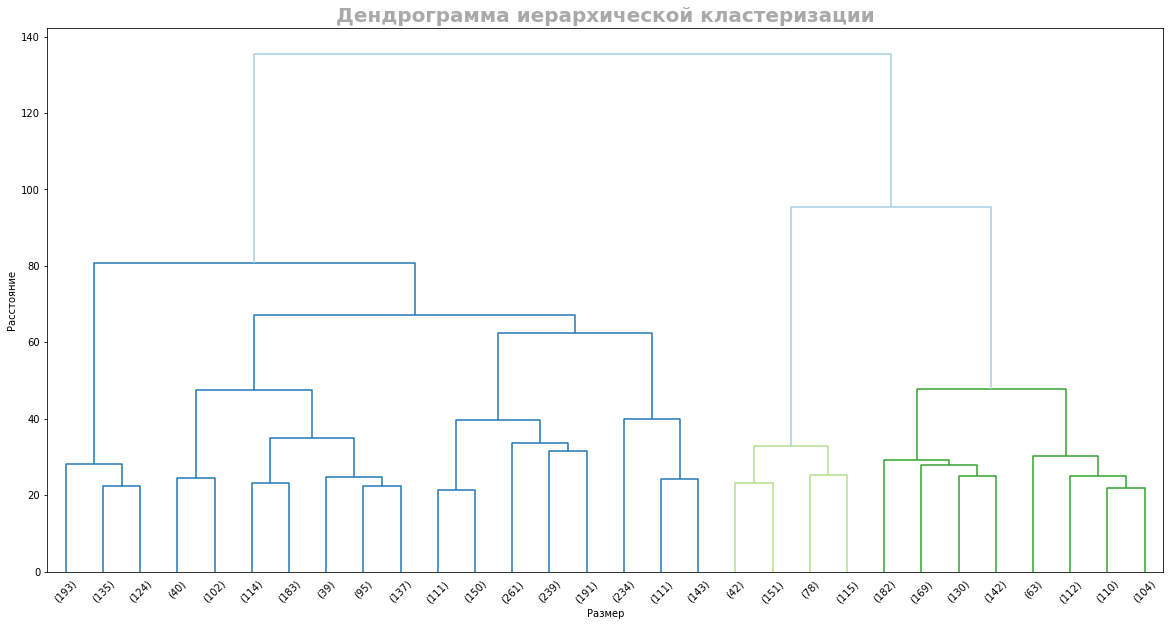

In [68]:
# Передаем значения методу linkage
linked = linkage(X_sc, 
                 method = 'ward')
#Построение дендрограмы
plt.figure(figsize=(20, 10))  
dendrogram(linked,
           truncate_mode = 'lastp',
           orientation = 'top')
plt.title('Дендрограмма иерархической кластеризации',
          fontsize = 20,
                    fontweight = 'bold', 
                    color = 'darkgrey'
                  )
plt.xlabel("Размер")
plt.ylabel("Расстояние")
plt.show() 

### Наблюдения по дендограмме


- Наблюдаются 4 кластера, последний стоит разделить на 2 т.к. он большой

### Выделяем кластеры и обучаем модель кластеризации на основании алгоритма K-means

In [69]:
# Число кластеров, равное 5
km = KMeans(random_state = 0,
            n_clusters = 5
           )  

# Применение алгоритма к данным и формирование вектора кластеров
labels = km.fit_predict(X_sc) 

# Сохранение меток кластера в поле датасета
gym_churn['clusters_km'] = labels
# Создаем перемнную со столбцами кроме churn для создания 
# таблицы с кластерами 
cols = gym_churn.columns.difference(['churn'])
gym_churn[cols].groupby(['clusters_km']).mean().round(3)\
.T.rename(columns={0: 'кластер 1', 
                   1: 'кластер 2',
                   2: 'кластер 3', 
                   3: 'кластер 4',
                   4: 'кластер 5'}
         )

clusters_km,кластер 1,кластер 2,кластер 3,кластер 4,кластер 5
age,29.98,28.17,28.48,29.30,30.12
avg_additional_charges_total,160.76,131.62,135.46,143.96,161.66
avg_class_frequency_current_month,1.98,1.01,1.48,1.72,2.85
avg_class_frequency_total,1.98,1.25,1.66,1.85,2.85
contract_period,10.89,1.95,2.35,4.79,2.67
gender,0.50,0.49,0.49,0.52,0.56
group_visits,0.54,0.34,0.22,0.43,0.47
lifetime,4.74,2.44,2.81,3.92,4.90
month_to_end_contract,9.95,1.86,2.20,4.47,2.46
near_location,0.96,1.00,0.00,0.86,0.98


In [70]:
### КОД РЕВЬЮЕРА
gym_churn.columns.difference(['churn'])

Index(['age', 'avg_additional_charges_total',
       'avg_class_frequency_current_month', 'avg_class_frequency_total',
       'clusters_km', 'contract_period', 'gender', 'group_visits', 'lifetime',
       'month_to_end_contract', 'near_location', 'partner', 'phone',
       'promo_friends'],
      dtype='object')

### Наблюдения по таблице кластеров


#### Кластер 1 
- Срок действия абонементов 10,9 месяцев (много)


- Посещают зал давно 4.7 месяцев


- Возраст 29.9


- 78,3% пришли по партнерским программам и 57,5% по рекомендации друзей


- Ходят в зал 2 раза в неделю


- Посещают групповые занятия 


- Не любят оставлять контактный номер


#### Кластер 2 

- 86,2% живут и/или работают рядом с фитнес центром 


- Отсутствие контактного номера


- Ходят в зал 2 раза в неделю


- 47% клиентов пришли по партнерским программам и 30,6% по рекомендации друзей

#### Кластер 3

- 100% не живут и/или работают рядом с фитнес центром


- 46,3% приходят по партнерским программам, 7,9% по рекомендации друзей


- мало тратят на доп услуги, редко посещают групповые тренировки


- начали посещать центр недавно  2,4 месяца назад


#### Кластер 4 

-  приобретают абонементы с самым коротким сроком действия 


- начали посещать центр недавно  2,4 месяца назад


- ходят один раз в неделю

#### Кластер 5 

-  приобретают абонементы с самым коротким сроком действия 


- часто ходят на групповые занятия 


- много тратят на дополнительные услуги - 161,7 у.е.,

### Распределения признаков кластеров

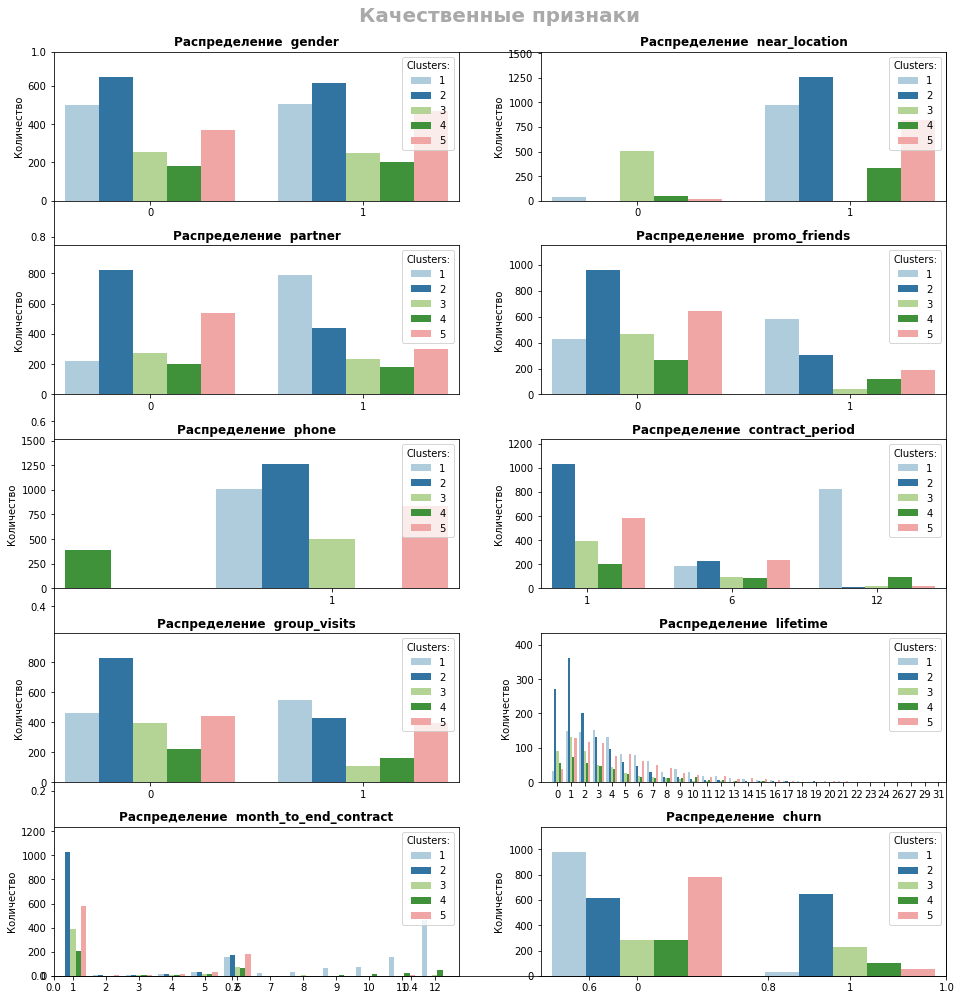

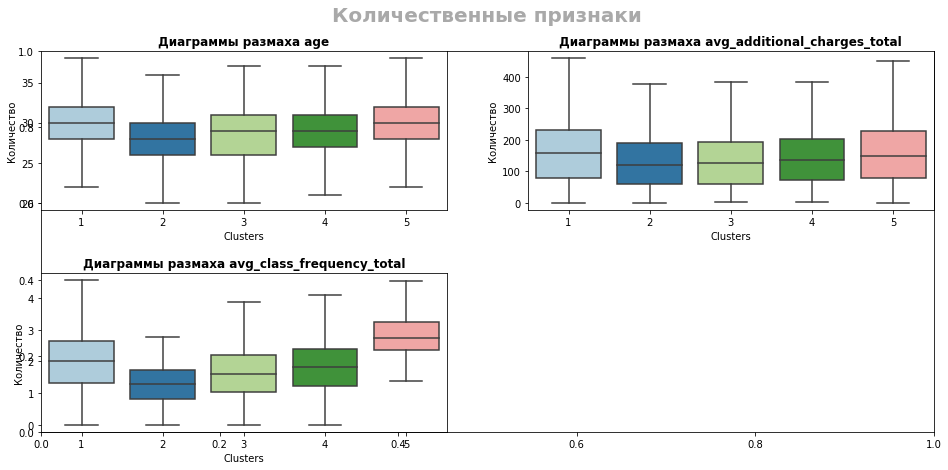

In [71]:
# Создаем список с качественными переменными 
quality = ['gender',
           'near_location',
           'partner',
           'promo_friends',
           'phone',
           'contract_period',
           'group_visits',
            'lifetime',
            'month_to_end_contract',
           'churn'
          ]
# Создаем список с количественными переменными 
quantity = ['age',
          'avg_additional_charges_total',
          'avg_class_frequency_total',
          'avg_class_frequency_current_month',
          ]
# Задаем размер графика
fig=plt.figure(figsize=(16,17))
# Задаем название
plt.title('Качественные признаки',
             fontsize = 20,
             fontweight = 'bold',
             color = 'darkgrey',
             pad = 30
            )
# Создаем цикл для отрисовки
for i, column_cl in enumerate(quality):
    ax = fig.add_subplot(5,
                         2,
                         i+1
                        )
    sns.countplot(x = column_cl,
                  hue = 'clusters_km',
                  data = gym_churn
                 )
    ax.margins(0.03, 0.2)
    ax.legend(title = 'Clusters:',
              labels = [1,
                        2,
                        3,
                        4,
                        5
                       ],
              loc = 'upper right'
             )
    plt.title('Распределение  '
              + column_cl,
              fontweight = 'bold') 
    plt.xlabel('')
    plt.ylabel('Количество')
    plt.subplots_adjust(hspace=0.3)
plt.show()
# Задаем размер графика
fig=plt.figure(figsize=(16,7))
# Задаем название
plt.title('Количественные признаки',
             fontsize = 20,
             fontweight = 'bold',
             color = 'darkgrey',
             pad = 30
            )
# Создаем цикл для отрисовки
for i, column_cl in enumerate(quantity[:-1]):
    ax=fig.add_subplot(2,
                       2,
                       i+1
                      )
    sns.boxplot(x=gym_churn['clusters_km'], 
                y=gym_churn[column_cl],
                showfliers=False
               )
    plt.title('Диаграммы размаха ' 
              + column_cl,
              fontweight='bold'
             ) 
    plt.xlabel('Clusters')
    plt.ylabel('Количество')
    plt.xticks([0,
                1, 
                2, 
                3, 
                4
               ],
               [1,
                2,
                3,
                4,
                5
               ]
              )
    plt.subplots_adjust(hspace=0.4)
plt.show()

### Наблюдения

- Графики подтверждают описанное выше


Рассмотрим отток по кластерам

### Гистограмма доли оттока по кластерам

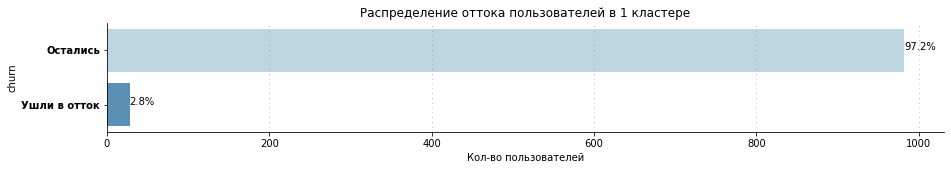

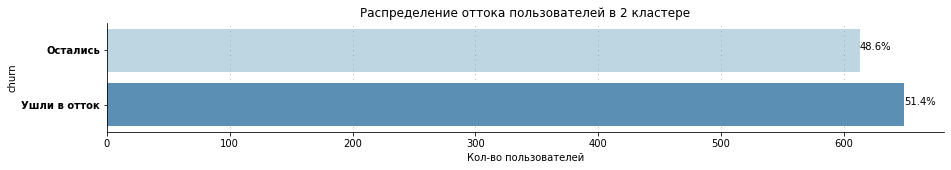

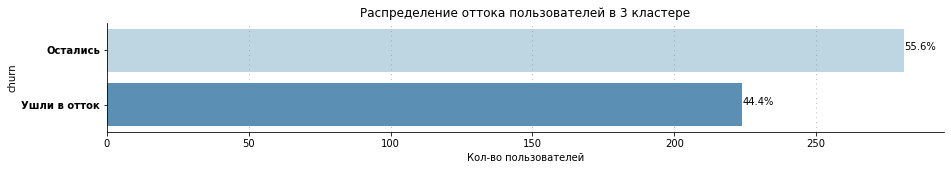

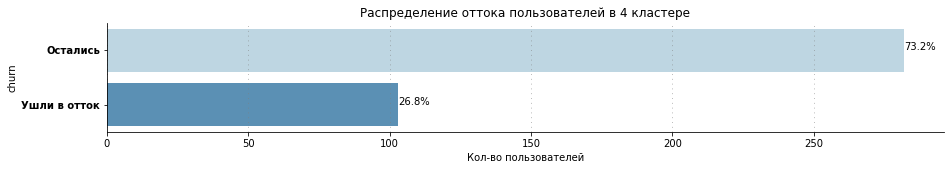

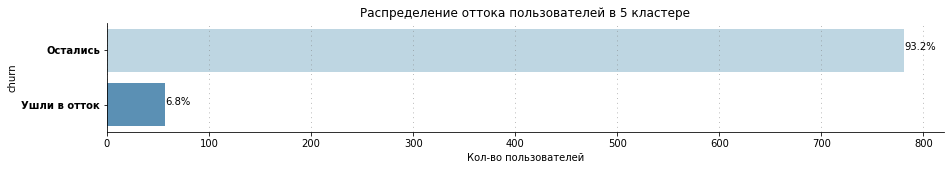

In [72]:
for i in range(5):
    fig = plt.figure(figsize=(15, 2)
                    )
    ax = sns.countplot(y = 'churn', 
                       data = gym_churn[gym_churn['clusters_km'] == i],
                       alpha=0.8
                      )
    total = gym_churn[gym_churn['clusters_km'] == i].shape[0]
    ax.grid(b= True,
            color='grey',
            linestyle='-', 
            axis='x',
            dashes=(1,5),
            alpha=0.8
           )
    ax.set_title('Распределение оттока пользователей в {} кластере'.format(i+1)
                )

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * 
                                      p.get_width() 
                                      / total
                                     )
        x = (p.get_x()
             + p.get_width()
            )
        y = (p.get_y() 
             + p.get_height() 
             / 2
            )
        ax.annotate(percentage,
                    (x, y)
                   )

    ax.set_xlabel('Кол-во пользователей')
    ax.set_yticklabels(['Остались','Ушли в отток'],
                         fontweight = 'bold'
                        )
    sns.despine()
    plt.show()

### Наблюдения по гистограмме оттока по кластерам

Высокий уровень оттока:

- 4 кластер - самый высокий
 
 
- 3 кластер 


Средний среднего уровень оттока 

- 2 кластер


Низкий уровень оттока:

- 1 кластер 


- 5 кластер


### Вывод по кластеризации

- Создано 5 кластеров 

По уровню оттока можно выделить: 


Высокий уровень оттока:

- 4 кластер - самый высокий
 
 
- 3 кластер 


Ниже среднего уровень оттока 

- 2 кластер


Низкий уровень оттока:

- 1 кластер 


- 5 кластер


Общая картина клиентов по кластерам 


#### Кластер 1 
Самые верные клиенты: ходят давно и долго, средний возраст, большинство ходят по партнерсим программам т.е. их устраивает цена, ходят в зал часто, посещают групповые занятия, но любят конфеденциальность (не оставляют номера)



#### Кластер 2 

Работают либо живут рядом с залом, им удобно посещать, предпочитают в принципе не давать контакты, ходят в зал два раза в неделю, почти половина - партнерская программа, средний отток (возможно пропадает мотивация)


#### Кластер 3

Им неудобно ходить в зал, так как они живут далеко от него, чуть меньше половины - имеют партнерскую программу, друзья практически не рекомендуют, не любят тратить лишние деньги, ходят недавно,групповые тренеровки не любят, высокий уровень оттока (второе место)


#### Кластер 4 

Ходят мало, недавно покупают абонементы с самым коротким сроком действия, самый выскоий уровень оттока 


#### Кластер 5 

Ходят часто и посещают групповые, покупают абонемент с коротким сроком, много тратят на доп услуги, низкий уровень оттока

## Общий вывод

### Вывод по EDA

- Больше 1/4 клиентов (26,5%) попали в отток.

 
- Существует 1018 клиетов, которых пригласили друзья, а также они являются членами партнерской программы.

Ситуация типичная, ведь часто сотрудники партнерской компании советуют друг другу фитнес центры на которые им выделяется скидка. Часто система приглашения друзей создает персональные скидки и выгодные условия для владельцев абонемента за каждого приглашенного друга.


- Большинство клиентов уходит в первый месяц по признаку month_to_end_contract


- Отток пользователей обратно коррелирует со средней частотой посещений в неделю за пред. месяц, с кол-во месяцев первого обращения, возраст. 


- Наибольшая корреляция по признакам длительности абонемента и среднего посещения, это логично


### Вывод по построению модели прогнозирования оттока клиентов

- По показателям лучшая модель - GradientBoostingClassifier


Ее показатели по метрикам: 

- Accuracy: 0.95
- Precision: 0.94
- Recall: 0.86
- F1: 0.90
- ROC_AUC: 0.99

По топ - 3 фич:

- lifetime
- avg_class_frequency_current_month
- avg_class_frequency_total


Влияние лайфтайма на отток логично - чем больше человек ходит, тем больше у него мотивации





Чаще всего уходят молодые пользователи, это может быть обусловленно нестабильностью доходов, отсутсвием мотивации. 


Влияние лайфтайма на отток логично - чем больше человек ходит, тем больше


### Вывод по кластеризации

- Создано 5 кластеров 

По уровню оттока можно выделить: 


Высокий уровень оттока:

- 4 кластер - самый высокий
 
 
- 3 кластер 


Ниже среднего уровень оттока 

- 2 кластер


Низкий уровень оттока:

- 1 кластер 


- 5 кластер


Общая картина клиентов по кластерам 


#### Кластер 1 
Самые верные клиенты: ходят давно и долго, средний возраст, большинство ходят по партнерсим программам т.е. их устраивает цена, ходят в зал часто, посещают групповые занятия, но любят конфеденциальность (не оставляют номера)



#### Кластер 2 

Работают либо живут рядом с залом, им удобно посещать, предпочитают в принципе не давать контакты, ходят в зал два раза в неделю, почти половина - партнерская программа, средний отток (возможно пропадает мотивация)


#### Кластер 3

Им неудобно ходить в зал, так как они живут далеко от него, чуть меньше половины - имеют партнерскую программу, друзья практически не рекомендуют, не любят тратить лишние деньги, ходят недавно,групповые тренеровки не любят, высокий уровень оттока (второе место)


#### Кластер 4 

Ходят мало, недавно покупают абонементы с самым коротким сроком действия, самый выскоий уровень оттока 


#### Кластер 5 

Ходят часто и посещают групповые, покупают абонемент с коротким сроком, много тратят на доп услуги, низкий уровень оттока

## Рекомендации

#### Кластер 1 
Регулярно проводить опросы по качеству обслуживания 



#### Кластер 2 

## Рекомендации

#### Кластер 1 
Возможно стоит регулярно проводить опросы по качеству обслуживания 



#### Кластер 2 

Возможно стоит повысить мотивацию посещения занятиями с тренером (персональная программа)


#### Кластер 3

Возможно стоит привлечь скидками и чем то необычным, например меропреятия, конкурсы, тематические ивенты, чтобы была мотивация приехать 


#### Кластер 4 

То же что и с кластером 3, но рекоммендуется уделить особое внимание, так как это самая рисковая группа по оттоку
Маленькие приятные сюрпризы доставят им массу положительных впечатлений. Главное, они поймут, что компания ценит их вклад в развитие бренда.


#### Кластер 5 

Возможно стоит ввести специальные скидки, уникальные предложения на товары 